In [1]:

import numpy as np
import scipy as sc

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import itertools


col_names = [ "sepal length in cm",
              "sepal width in cm",
              "petal length in cm",
              "petal width in cm",
              "class" ]

iris_ds = pd.read_csv( r"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                       sep = ",", names = col_names )

classes   = np.unique( iris_ds['class'] )

dic_class = { classes[k] : k for k in range(0,len( classes ) ) }

def class_to_n( k ):    
    if k == "Iris-setosa":
        return 0
    if k == "Iris-versicolor":
        return 1
    if k == "Iris-virginica":
        return 2

iris_alt = ( iris_ds. 
               assign( y0   = lambda d: [ 1 if i == 'Iris-setosa'     else 0 for i in iris_ds['class']],
                       y1   = lambda d: [ 1 if i == 'Iris-versicolor' else 0 for i in iris_ds['class']],
                       y2   = lambda d: [ 1 if i == 'Iris-virginica'  else 0 for i in iris_ds['class']],
                     
                       class_2 = lambda x: list( map( lambda k: dic_class[ k ], x["class"] ) )) )
            

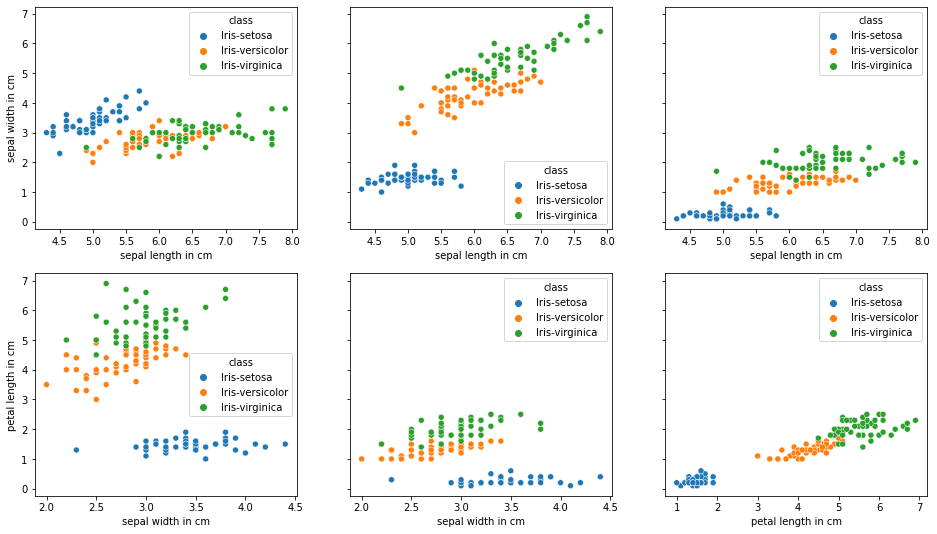

In [2]:
import seaborn as sns

names = [ "sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm" ]

comb = list(itertools.combinations( names , 2) )

fig, ax = plt.subplots( 2,3, figsize=(16,9), sharey=True )

cords    = [ [j,i]  for j in range( 0, 2 )  for i in range( 0,  3 ) ]

# print( cords )

for i in range( 0, len( comb ) ):
    
    sns.scatterplot(
        ax = ax[ cords[i][0], cords[i][1] ],
        data = iris_alt,
        x = comb[i][0], y = comb[i][1], hue = 'class'
    )



In [3]:
# Importando scripts de códigos de regressão logística em diversas variações

import os 

dir_path = os.getcwd()

os.chdir( dir_path.replace( "notebooks", "src" ) )

%run Logistic_Simples_Multinomial.py


In [4]:


class Logistic_Reg:
    
    def __init__( self, X, y, reg = "none", int_ = True ):
        """
        Inicialização
        --------------
        X    : Lista de variaveis Independentes
        y    : Variavel Dependente ( Binaria )
        int_ : Intercepto ( Modelo calculado com Intercepto se True )
        --------------
        """
        
        self.X    = X
        self.y    = y
        
        self.int_ = int_
        
        if int_ :
            self.b    = np.zeros( len( X ) + 1 )
            
        else :
            self.b    = np.zeros( len( X ) )
        
    def Sig( self, X, b ):
        """
        Função Sigmoid
        --------------
        X : Lista de variaveis Independentes
        b : Lista de Parametros
        
        --------------
        return 
        --------------
        
        Lista com as probabilidades da funcao Sigmoid
        f( X ) = 1 / ( 1 + exp ( X'b ) ) 
        --------------
        """
    
        return 1/(1 + np.exp( - X @ b ) )

    def cost( self, b, X, y ):
        """
        Função Custo
        --------------
        b : Lista de Parametros
        X : Lista de variaveis Independentes
        y : Variavel Dependente ( Binaria )
        
        --------------
        return 
        --------------
        
        Custo total do modeo
        y*log( Sig ) - (1-y)*log( 1 - Sig )
        --------------
        """
    
        p = self.Sig( X, b )
        N = len( y )
    
        return  - np.sum( y.reshape( N ).astype(float) * np.log( p ) + (1-y.reshape( N ).astype(float))*np.log( ( 1 - p ) ) )
    
    def gradient( self, b, X, y ):
        """
        Calculo do Gradiente dos parametros
        --------------
        b : Lista de Parametros
        X : Lista de variaveis Independentes
        y : Variavel Dependente ( Binaria )
        
        --------------
        return 
        --------------
        
        Gradiente por variavel
        ( 1/N ) * X.T * ( Sig - y )
        --------------
        """
        
    
        #print( b )
    
        p = self.Sig( X, b )
        N = len( y )
    
        grad =  (1/N) * X.T @ ( p - y.reshape( N ).astype(float) ) 
    
        return grad
        
    def update_weigths( self, X, y, lr, itr, reg = "none", lamb = 1.0 ):
        """
        Calculo do Gradiente dos parametros
        --------------
        X    : Lista de variaveis Independentes
        y    : Variavel Dependente ( Binaria )
        lr   : Learning Rate
        itr  : Número de iterações
        reg  : Regularização ( `l1`, `l2`, `none` ) 
        lamb : Lambda Regularização
        
        --------------
        return 
        --------------
        
        Historico de Custo, e dos parametros por iterações
        --------------
        """
    
        b = np.zeros( X.shape[1] )
    
        cost_hist = []
        par_hist  = [ b ]
    
    
        if reg == "l2":
            l1, l2 = 0, 1
        if reg == "l1":
            l1, l2 = 1, 0
        if reg == "none":
            l1, l2 = 0, 0
    
        #print( l1,l2 )
    
    
        for i in range( 0, itr ):
        
            grd = self.gradient( b, X, y ) 
        
            cst = self.cost( b, X, y )
        
            r = l2*lr*lamb*np.array(b)/len(y)

            b = np.array( b ) - lr*grd - r
        
            par_hist.append( b )
            cost_hist.append( cst )
        
        return cost_hist, par_hist
    
    def fit( self, reg = "none", lamb = 1.0, par_hist = True, lr = 0.5, itr = 100000 ):
        """
        Função Fit do modelo
        --------------
        reg      : Lista de variaveis Independentes
        lamb     : Variavel Dependente ( Binaria )
        par_hist : Guardar Histórico dos parametros
        lr       : Learning Rate
        itr      : Número de iterações

        --------------
        return 
        --------------
        
        Log_Reg model object
        --------------
        """
    
        
        if self.int_ :
            
            self.X = np.concatenate( ( np.ones( len( self.X ) ).reshape( -1, 1 ), self.X ), axis=1 )
        
        # Checando Dimensões
        
        if len( self.X ) != len( self.y ):
            
            raise ValueError("Rows of `X`, different from `y`")
        
        self.lr  = lr
        self.itr = itr
        
        res = self.update_weigths( X = self.X, y = self.y, lr = self.lr, itr = self.itr, reg = reg, lamb = lamb )
        
        if not par_hist :
            _model = { 'final_par' : res[1][len( res[1] ) - 1 ],
                       'cost_hist' : res[0] }
            
        else :
            _model = { 'final_par' : res[1][len( res[1] ) - 1 ],
                       'par_hist'  : res[1],
                       'cost_hist' : res[0] }
        
        self.model =  _model
        
        return self
    
    def predict( self, Xp ):
        
        # Checando dimensões e parametros
        #if len( self.X ) != len( Xp ):
            
        #    raise ValueError("Different number of dimensions between `Xp` and `X`" )
        
        if self.int_ :
            
            Xp = np.concatenate( ( np.ones( len( Xp ) ).reshape( -1, 1 ), Xp ), axis=1 )
        
        #print( self.model['final_par'] )
        #print( self.model['final_par'].shape )
        #print( np.array( Xp ).shape )
        
        probs = self.Sig( np.array( Xp ), self.model['final_par']  )
        
        self.probs = probs
        
        self.pred_clas = np.array( list( map( lambda x: np.argmax( x ), probs ) ) )
        
        return self
        

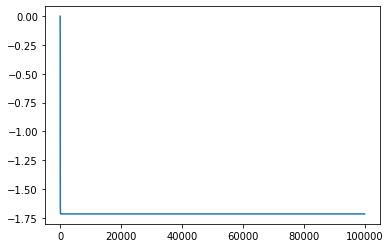

In [5]:

model_logreg = Logistic_Reg( X = np.array( iris_alt.loc[:,['petal width in cm']] ), y = np.array( iris_alt.loc[:,['y0']] ), int_ = False )
        
model_2 = model_logreg.fit( reg = "l2" )

model_2 = model_2.predict( Xp =  np.array( iris_alt.loc[:,['petal width in cm']] ) )

model_2.model['final_par']

fix, ax = plt.subplots()
ax.plot( list( map( lambda x: x[0], model_2.model["par_hist"] ) ) )
#ax.plot( list( map( lambda x: x[1], model_2.model["par_hist"] ) ) )


In [4]:
import sklearn
from sklearn.linear_model import LogisticRegression

X, y = iris_alt[['petal width in cm']], iris_alt['y0']
clf = LogisticRegression(random_state=0, fit_intercept = False).fit(X, y )

#, penalty = 'none'
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

#clf.score(X, y)

In [8]:
#print(clf.intercept_, clf.coef_ )

print( clf.predict( X ), y )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] 0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: y0, Length: 150, dtype: int64


# Regressão Logística Multinomial Softmax

Na seção acima, foi apresentado toda a problemática envolvendo as regressões logísticas, aonde desejavamos classificar observações entre acontecimentos e não acontecimentos de um determinado evento, porém para além de problemas de classificação binária, é comum se encontrar em situações aonde desejamos classificar um grupo de observações em contextos que envolvem mais de uma classe, podendo essa variar de 2 para muitas classes.

É nesse contexto que se encaixam a regressão logística multinomial softmax, ao invés de classificar uma saida binaria generalizamos a regressão logística para N classes.

$$ \begin{bmatrix} P( y = 1 | \theta ) \\ P( y = 2 | \theta ) \\ ... \\ P( y = N | \theta ) \end{bmatrix} = \frac{1}{\sum_{j=1}^{K}exp( \theta_{j}^{T}X )} \begin{bmatrix} exp( \theta_{1}^{T}X ) \\ exp( \theta_{2}^{T}X ) \\ ... \\ exp( \theta_{N}^{T}X ) \end{bmatrix} $$

aonde:

$$ \theta = \begin{bmatrix} \theta_1 \\ \theta_2 \\ ... \\ \theta_N \end{bmatrix} $$

Podemos passar de uma notação vetorial para uma equação mais geral, aonde temos a função custo da regressão softmax:

$$ P(y_{i} = k | \theta ) = \frac{ exp( \theta_{k}^{T}X ) }{ \sum_{ j \in K }exp( \theta_{j}^{T}X ) } $$

Para a estimação por meio de algoritmo, como \textit{ gradient descent }, remos abaixo um exemplo dos gradientes calculados:

$$ \nabla f(\theta) = - \sum_{i=1}^{m} [1*( j = i ) - P(y_{i} = k | \theta )]  $$


## Softmax caso de duas classes

Caso especial quando estimamos a regressão logística multinomial Softmax para um número de classes igual a dois conseguimos fazer uma relação entre a regressao softmax e uma logistica de saida binaria. Assim

$$ \begin{bmatrix} P( y = 1 | \theta ) \\ P( y = 2 | \theta ) \end{bmatrix} = \frac{1}{ exp( \theta_{1}^{T}X ) + exp( \theta_{2}^{T}X )} \begin{bmatrix} exp( \theta_{1}^{T}X ) \\ exp( \theta_{2}^{T}X ) \end{bmatrix} $$

é possivel manipular algebricamente essa equação de modo que se subtraia $\theta_2$ das equaçoes de modo que a equação fique:

$$ \begin{bmatrix} P( y = 1 | \theta ) \\ P( y = 2 | \theta ) \end{bmatrix} = \frac{1}{ exp( (\theta_{1}^{T} - \theta_{2}^{T})X ) + exp( (\theta_{2}^{T} - \theta_{2}^{T})X )} \begin{bmatrix} exp( (\theta_{1}^{T} - \theta_{2}^{T})X ) \\ exp( (\theta_{2}^{T} - \theta_{2}^{T})X ) \end{bmatrix} $$

$$ \begin{bmatrix} P( y = 1 | \theta ) \\ P( y = 2 | \theta ) \end{bmatrix} = \frac{1}{ exp( (\theta_{1}^{T} - \theta_{2}^{T})X ) + exp( 0 )} \begin{bmatrix} exp( (\theta_{1}^{T} - \theta_{2}^{T})X ) \\ exp( 0 ) \end{bmatrix} $$

$$ \begin{bmatrix} P( y = 1 | \theta ) \\ P( y = 2 | \theta ) \end{bmatrix} = \frac{1}{ 1 + exp( (\theta_{1}^{T} - \theta_{2}^{T})X ) } \begin{bmatrix} exp( (\theta_{1}^{T} - \theta_{2}^{T})X ) \\ 1 \end{bmatrix} $$

Retirando da notação vetorial temos a seguinte forma:

$$ P( y = 1 | \theta ) = \frac{ exp( (\theta_{1}^{T} - \theta_{2}^{T})X )  }{ 1 + exp( (\theta_{1}^{T} - \theta_{2}^{T})X ) } $$

$$ P( y = 2 | \theta ) = \frac{ 1 }{ 1 + exp( (\theta_{1}^{T} - \theta_{2}^{T})X ) } $$

Manipulando algebricamente podemos chegar a conclusão que no segundo caso:

$$ P( y = 2 | \theta ) = 1 - P( y = 1 | \theta ) = 1 - \frac{ exp( (\theta_{1}^{T} - \theta_{2}^{T})X ) }{ 1 + exp( (\theta_{1}^{T} - \theta_{2}^{T})X ) } $$

Logo chegamos ao estágio em que encontramos uma relação direta entre a regressão logistica multinomial softmax e a regressão logística, na regressão logistica softmax encontramos uma curva que discrimina cada classe índividualmente das demais, enquanto no caso da regressão logística, encontramos apenas uma curva que busca discriminar as duas classes, ao estimar uma regressão softmax para o caso de N = 2, são calculadas duas curvas, porém a subtração dos parametros seria o resultado de uma curva calculada por um modelo de regressão logística convencional.


Referência: http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/

In [9]:

from scipy.optimize import minimize
from scipy.optimize import fmin_bfgs

class Multinomial_LogReg:
    
    def __init__( self, X, y, init_par = None, Intercept = False ):
        
        self._int     = Intercept
        self.X        = X
        self.y        = y
        self.init_par = init_par
    
    def softmax( self, b ):
        '''
        Função Softmax
        --------------
        b : Lista de Parametros ( n = classes )
        X : Lista de variaveis Independentes
        
        --------------
        return 
        --------------
        
        Lista com as probabilidades da funcao SoftMax
        `exp( bi'x ) / sum_j_N exp( bj'x )
        --------------
        '''
        y_hat = np.dot( b.T, self.X )
        
        y_hat = np.exp( y_hat )
        
        sum_yhat = np.sum( y_hat, 0 )
        
        return y_hat/sum_yhat 

    # Funcao Custo
    
    def softmax_cost (self, b ):
        '''
        Função de Custo Softmax
        --------------
        b : Lista de Parametros ( n = classes )
        X : Lista de variaveis Independentes
        y : Lista de variaveis dependentes
        
        --------------
        return
        --------------
        Retorna Custo Calculado
        
        '''
        
        p = np.array( b ).reshape( -1, len( self.y ) )
        
        # print( p )

        return - np.mean( np.multiply( self.y, np.log( self.softmax( p ) ) ) )
    

    def obj_function( self, b ):
        '''
        Funçao Objetivo
        --------------
        b : Lista de Parametros
        
        --------------
        return
        --------------
        Retorna calculo de custo
        
        '''
        
        # p = np.array( b ).reshape(-1,len(X))
        
        return self.softmax_cost( b = b )


    def softmax_fit( self ):
        '''
        Função fit Softmax
        --------------
        X : Lista de variaveis Independentes
        y : Lista de variaveis dependentes
        
        --------------
        return
        --------------
        
        '''
        # Caso intercepto
        
        n = 0
        
        if self._int :
             
            self.X = np.append( np.array( [ np.ones( len( self.X[ 0 ] ) ) ] ), self.X  ).reshape( len( self.X ) + 1, len( self.X[ 0 ] ) )
            
            n = 1
            
        # Valida dimensões e parametros

        ndin_x, ndin_y = len( self.X ), len( self.y )
        
        if ndin_x == 0 or ndin_y == 0:
            raise ValueError("Number of dimensions is equal a 0")
        
        row_x, row_y = len( self.X[0] ), len( self.y[0] )
        
        if row_x == 0 or row_y == 0:
            raise ValueError("Number of rows is equal a 0")
            
        if row_x != row_y:
            raise ValueError("Different number of rows between `X` and `y`")
            
        
        # Parametro Inicial
        
        if self.init_par != None:
            
            # Validando parametros Iniciais
            if len( self.init_par ) != ndin_y + n :
                raise ValueError("Dimension of Initial Parameters, different from dependent variable `y`")
            
            else: 
                
                par_lens = [ len( i ) == ndin_x for i in self.init_par ]
                
                if np.sum( par_lens ) != len( par_lens ) :
                    ValueError("Different Numebers of dimension passed as initial parameters from indepdente variables")
                    
                
            init_par = self.init_par
            
        # print( self.init_par )
        
        # print( ndin_x )
            
        if self.init_par == None:
            
            # Cria parametros Iniciais
            init_par = [ [ 0 for j in range(0, ndin_x  ) ] for k in range(0, len( self.y ) ) ]
            
        # print( init_par )
        # print( self.X )
            
        return fmin_bfgs( self.obj_function, init_par )
    
    def predict( self, X ):
        
        '''
        Predict Probability for the classes given set of response variables
        --------------
        X : Vector os Independent variables
        
        --------------
        return
        --------------
        Predicted probalities for `n` classes
        
        '''
        
        model_par = np.array( self.softmax_fit( ) ).reshape( -1, len( self.y ) )
        
        
        return self.softmax( model_par, self.X ).reshape( -1, len( self.y ) )
    
model_ = Multinomial_LogReg( X = np.array( [np.array(iris_alt['petal width in cm']), np.array(iris_alt['petal length in cm'])] ) , 
                             y = [iris_alt['y0'],iris_alt['y1'],iris_alt['y2']], Intercept = True )


print( np.array( model_.softmax_fit( ) ) )

#

# model_.predict( X = np.array( [np.array(iris_alt['petal width in cm']), np.array(iris_alt['petal length in cm'])] ) )


Optimization terminated successfully.
         Current function value: 0.022848
         Iterations: 40
         Function evaluations: 410
         Gradient evaluations: 41
[ 49.10233359  -1.91308297 -47.18925584 -21.83563399   5.69414118
  16.14148585 -10.57798924   2.41143037   8.16651658]


[ 41.08973553   2.09196085 -43.18169637]
[[ -8.08440792 -18.0196331 ]
 [  1.16488948   3.78620869]
 [  6.91951844  14.23342441]]


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


<AxesSubplot:>

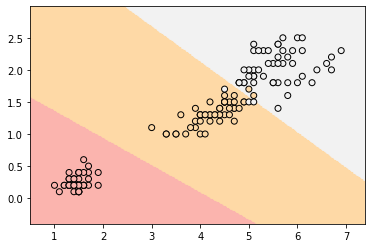

In [8]:

import sklearn
from sklearn.linear_model import LogisticRegression

X, y = iris_alt[['petal length in cm','petal width in cm']], iris_alt['class_2']

clf = LogisticRegression(random_state=0, fit_intercept = True, penalty = 'none').fit(X, y )
# Função para plotar Funções

print( clf.intercept_ )
print( clf.coef_ )

def plot_softmax_model( model_, X, y, h = 0.01, alpha = 0.5 ):
    
    '''
    Função de plot fronteiras Softmax
    --------------
    model_ : Objeto de Modelo Softmax - SciKit Learn
    X      : Objeto Pandas DataFrame com as variáveis independentes
    y      : Objeto Pandas DataFrame com a variável dependente
    h      : Passo para construir a matrix de variáveis dependentes
    alpha  : Parametro `alpha` de transparencia
    --------------
    return
    --------------
    Objeto subplots da biblioteca matplotlib.pyplot com fronteiras e scatterplot
    '''
    
    
    X = np.array( X ).reshape( -1, len( X.columns ) )
    
    # Constroi variáveis inputs para plots
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predizendo Classes com inputs criados
    
    Z = model_.predict( np.c_[xx.ravel(), yy.ravel()] )
    Z = Z.reshape(xx.shape)
    
    # Etapa Plot
    
    f, ax = plt.subplots()
    
    ax.pcolormesh( xx, yy, Z, cmap=plt.cm.Pastel1, alpha = alpha )
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Pastel1 )
    

    return ax
    
    #plt.pcolormesh( xx, yy, Z, cmap=plt.cm.Pastel1, alpha = 0.5 )
    #plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Pastel1 )


plot_softmax_model( model_ = clf, X = X, y = y )




Versao utilizando o Algoritmo de Gradient Descent

In [4]:



from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

class Multinomial_LogReg_gd:
    
    def __init__( self, X, y, intercept = False, lr = 0.1, itr = 800000 ):
        self.X   = np.array( X )
        self.Y   = np.array( y )
        self.y   = onehot_encoder.fit_transform( np.array( y ).reshape(-1,1))
        self.int = intercept
        self.lr  = lr
        self.itr = itr
        
    def softmax_fun( self, b, X ):
        
        y_hat = np.exp( - X @ b )
        
        sum_yhat = np.sum( y_hat, axis = 1 ).reshape( -1,1 )
        
        return y_hat/sum_yhat 
    
    def cost( self, b, X, y ):
        
        p = self.softmax_fun( b, X )
        
        N = len( y )
        
        return  1/N * (np.trace(X @ b @ y.T) + np.sum(np.log(np.sum(np.exp( - X @ b ), axis=1))))
        
    def gradient( self, b, X, y ):
        
        p = self.softmax_fun( b, X )
    
        N = len( y )

        grad = (1/N)*( X.T @ ( ( y - p ) ) )
    
        return grad
        
    def update_weights( self, X, y, lr, itr ):
        
        # Parametros iniciais
        
        b = np.zeros( ( len( X[0] ), len( y[0] ) ) )

    
        cost_hist, par_hist = [], [ b ]
    
        # Loop de iterações
    
        for i in range( 0, itr ):
                 
            # Calculo do Gradiente e Custo
        
            grd = self.gradient( X = X , y = y, b = b )

            cst = self.cost( b = b, X = X, y = y )
        
            # Atualiza Parametro com Informações do Gradiente
        
            b = np.array( np.array( b ) - lr*grd )
            
            # Armazena histórico
            
            cost_hist.append( cst )
            
            par_hist.append( b )
        
        return { 'Cost_Hist' : cost_hist , 'Par_Hist' : par_hist } #{ "Parametro" : b, "Custo" : cst }
    
    
    def fit( self, par_hist = False ):
        
        if self.int :
            
            self.X = np.concatenate( ( np.ones( len( self.X ) ).reshape( -1, 1 ), self.X ), axis=1 )
        
        # Checando Dimensões
        
        if len( self.X ) != len( self.y ):
            
            raise ValueError("Rows of `X`, different from `y`")
            
        res = self.update_weights( X = self.X, y = self.y, lr = self.lr, itr = self.itr )
        
        if not par_hist :
            _model = { 'final_par' : res['Par_Hist'][len( res['Par_Hist'] ) - 1 ],
                       'cost_hist' : res['Cost_Hist'] }
            
        else :
            _model = { 'final_par' : res['Par_Hist'][len( res['Par_Hist'] ) - 1 ],
                       'par_hist'  : res['Par_Hist'],
                       'cost_hist' : res['Cost_Hist'] }
        
        self.model =  _model
        
        return self
    
    def predict( self, Xp ):
        
        # Checando dimensões e parametros
        #if len( self.X ) != len( Xp ):
            
        #    raise ValueError("Different number of dimensions between `Xp` and `X`" )
        
        if self.int :
            
            Xp = np.concatenate( ( np.ones( len( Xp ) ).reshape( -1, 1 ), Xp ), axis=1 )
        
        #print( self.model['final_par'] )
        #print( self.model['final_par'].shape )
        #print( np.array( Xp ).shape )
        
        probs = self.softmax_fun( self.model['final_par'], np.array( Xp ) )
        
        self.probs = probs
        
        self.pred_clas = np.array( list( map( lambda x: np.argmax( x ), probs ) ) )
        
        return self
    
    def predict_b( self, Xp, bp ):
        
        if self.int :
            
            Xp = np.concatenate( ( np.ones( len( Xp ) ).reshape( -1, 1 ), Xp ), axis=1 )
        
        
        probs = self.softmax_fun( bp , np.array( Xp ) )
        
        pred_clas = np.array( list( map( lambda x: np.argmax( x ), probs ) ) )
        
        return pred_clas
    
    def plot_model( self,  h = 0.01, alpha = 0.5 ):
        
        # Confere se modelo tem Intercepto
        
        d = 0
        
        if self.int :
            
            d = 1
        
        print(  self.X.shape  )
        print(  len( self.X )  )
        # Confere se o modelo tem apenas 2 dimensoes ( X1 e X2 )
        
        if len( self.X[0] ) - d != 2 :
            
            raise ValueError( "Number of dimensions different than 2" )
    
        # Constroi variáveis inputs para plots
    
        x_min, x_max = self.X[:, 0 + d].min() - 0.5, self.X[:, 0 + d].max() + 0.5
        y_min, y_max = self.X[:, 1 + d].min() - 0.5, self.X[:, 1 + d].max() + 0.5
    
        xx, yy = np.meshgrid( np.arange(x_min, x_max, h), np.arange(y_min, y_max, h) )
        
        x_shape = xx.shape
        
        aa = np.ones( x_shape[0]*x_shape[1] ).reshape( x_shape )
        
        Z = self.predict( Xp = np.c_[xx.ravel(), yy.ravel()] ).pred_clas
        Z = Z.reshape(xx.shape)
        
        # Etapa Plot
    
        f, ax = plt.subplots()
    
        ax.pcolormesh( xx, yy, Z, cmap=plt.cm.Pastel1, alpha = alpha )
        ax.scatter( self.X[:, 0+d], self.X[:, 1+d], c= self.Y, edgecolors="k", cmap=plt.cm.Pastel1 )
    
        return ax

    

X = iris_alt.loc[ :, ['petal length in cm','petal width in cm'] ]         

y = iris_alt.loc[ :, [ 'class_2' ] ]

softmax_model = Multinomial_LogReg_gd( X = X, y = y, intercept =True )

softmax_model = softmax_model.fit( par_hist = True ).predict( Xp = X )

# softmax_model.plot_model()
# softmax_model.cost_plot()

    

In [12]:
softmax_model.model['final_par']

array([[-27.75762397,  -8.36085068,  36.11847465],
       [  5.25293983,   0.19184374,  -5.44478357],
       [  9.61053043,   0.35244187,  -9.96297229]])

Gráficos colocando a evolução dos parâmetros estimados a cada iteração.

array([[<AxesSubplot:title={'center':'$\\theta_{0,0}$'}>,
        <AxesSubplot:title={'center':'$\\theta_{0,1}$'}>,
        <AxesSubplot:title={'center':'$\\theta_{0,2}$'}>],
       [<AxesSubplot:title={'center':'$\\theta_{1,0}$'}>,
        <AxesSubplot:title={'center':'$\\theta_{1,1}$'}>,
        <AxesSubplot:title={'center':'$\\theta_{1,2}$'}>],
       [<AxesSubplot:title={'center':'$\\theta_{2,0}$'}>,
        <AxesSubplot:title={'center':'$\\theta_{2,1}$'}>,
        <AxesSubplot:title={'center':'$\\theta_{2,2}$'}>]], dtype=object)

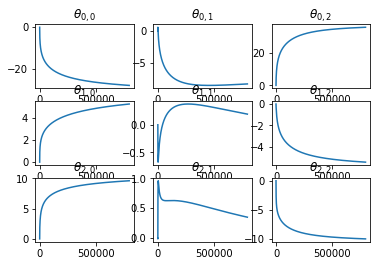

In [13]:
# softmax_model.plot_model()

def plot_pars_hist( par_hist ):
    
    shapes = par_hist.shape
    
    data_par = pd.DataFrame( par_hist.reshape( len( par_hist ), shapes[1]*shapes[2] ) )
    
    cords    = [ [j,i]  for j in range( 0, shapes[1] )  for i in range( 0,  shapes[2] ) ]
    
    # Plots
    
    fig, ax = plt.subplots( 3, 3 )

    for i in range( 0, len( cords ) ) :
        
        # print( "b ("+str(cords[i][0])+ ","+ str(cords[i][1] )+ ")" )
        k = r"{"+str(cords[i][0])+","+ str(cords[i][1])+ r"}" 
        
        ax[ cords[i][0], cords[i][1] ].plot(  np.array( data_par[ data_par.columns[ i ] ] ) )
        ax[ cords[i][0], cords[i][1] ].set_title( r"$\theta_"+k+r"$" )
    
    return ax


plot_pars_hist( np.array( softmax_model.model['par_hist'] ) )
    

# Calculando Gradiente

Função custo para a regressão logística multinomial (Softmax)

$$ P(y_{i}=k|z_{i};\theta) = \frac{exp(\theta_{k}^{T} X)}{ \sum_{j\in K} exp(\theta_{j}^{T} X)}$$

$$ J(\theta) = - [ \sum_{ i=1}^{m} (1-y_{i})log(1-h(x_{i}))+y_{i}log(h(x{i}))] $$


$$ = \sum_{ i=1}^{m} \sum_{ k=0}^{1} 1[i=k] log( P(y_{i}=k|z_{i};\theta))$$

Se quisermos estimar a regressão logística multinomial softmax, precisamos calcular o gradiente de $J(\theta)$ em cada um dos itens de $\theta$.

Abaixo detalharemos um exemplo algebrico de como é estimado o gradiente, para esse exemplo em específico, utilizaremos três classes, e apenas uma variavel dependente sem intercepto, o intuito de realizar esse exemplo simples é conseguir entender o processo e as manipulações envolvidas, e por isso desejamos reduzir a complexidade. 
logo:

$K = 3$


$$ P(y_{i}=k|z_{i};\theta) = \frac{exp(\theta_{1}^{T} X)}{ exp(\theta_{1}^{T} X)+exp(\theta_{2}^{T} X)+exp(\theta_{3}^{T} X)} $$
Logo calcularemos a derivada de $J(\theta)$ em relação ao parâmetro $\theta_{1}$:

$$ \frac{ dJ(\theta)}{ d\theta_{1} } = \frac{d (log(P(yi​=k∣zi​;θ)))}{d\theta_{1}}$$

Como um primeiro passo, vamos observar que temos um caso de regra da cadeia, aonde temos a função $P(y_{i}=k|z_{i};\theta)$ dentro da função $log$, de modo que temos
$$ J(\theta) = y(u(\theta_{1})) $$

regra da cadeia:

$$ \frac{dy}{dx} = \frac{dy}{du}*\frac{du}{dx} $$

$$ \frac{ d[y(u)] }{ du } = \frac{d[ log(u) ] }{ du} =\frac{ 1 }{ u }$$

aonde

$$ u(\theta_{1}) = \frac{exp(\theta_{1}^{T} X)}{ exp(\theta_{1}^{T} X)+exp(\theta_{2}^{T} X)+exp(\theta_{3}^{T} X)}  $$
logo
$$ \frac{ d[y(u)] }{ du } = \frac{d[ log(u) ] }{ du} = \frac{ exp(\theta_{1}^{T} X)+exp(\theta_{2}^{T} X)+exp(\theta_{3}^{T} X)}{exp(\theta_{1}^{T} X)} $$

calculando a segunda parte aonde fazemos a derivada de $P(y_{i}=k|z_{i};\theta)$, para essa função em específico é necessario aplicar a regra da divisão das derivadas
$$ \frac{ d[u(\theta_{1})] }{ d\theta_{1} } = (\frac{d[exp(\theta_{1}^{T} X)]}{d\theta_{1}}[\sum_{j\in K} exp(\theta_{j}^{T} X)]  - \frac{d[\sum_{j\in K} exp(\theta_{j}^{T} X)]}{d\theta_{1}}exp(\theta_{1}^{T} X))*\frac{1}{(\sum_{j\in K} exp(\theta_{j}^{T} X))^2}$$

$$ = x_{i}exp(\theta_{1}^{T} X) *[\sum_{j\in K} exp(\theta_{j}^{T} X)]-x_{i}exp(\theta_{1}^{T} X) *\frac{1}{(\sum_{j\in K} exp(\theta_{j}^{T} X))^2}$$

$$ =\frac{x_{i} * exp( \theta_{1}^{T} X )*(exp( \theta_{2}^{T} X )+exp( \theta_{3}^{T} X )) }{(\sum_{j\in K} exp(\theta_{j}^{T} X))^2} $$

completando a derivada por regra da cadeia multiplicamos $\frac{ d[u(\theta_{1})] }{ d\theta_{1} }$ por $\frac{ d[y(u)] }{ du }$ e ficamos com

$$ = \frac{x_{i} * exp( \theta_{1}^{T} X )*(exp( \theta_{2}^{T} X )+exp( \theta_{3}^{T} X )) }{(\sum_{j\in K} exp(\theta_{j}^{T} X))^2} * \frac{ \sum_{j\in K} exp(\theta_{j}^{T} X)}{exp(\theta_{1}^{T} X)}  $$

$$ =  \frac{ x_{i}*(exp( \theta_{2}^{T} X )+exp( \theta_{3}^{T} X )) }{\sum_{j\in K} exp(\theta_{j}^{T} X)} $$

podemos manipular algebricamente essa expressão de forma que:

$$ \frac{ (exp( \theta_{2}^{T} X )+exp( \theta_{3}^{T} X )) }{\sum_{j\in K} exp(\theta_{j}^{T} X)} = 1 - P(y_{i}=k|z_{i};\theta)  $$
assim

$$ =  \frac{ x_{i}*(exp( \theta_{2}^{T} X )+exp( \theta_{3}^{T} X )) }{\sum_{j\in K} exp(\theta_{j}^{T} X)} = x_{i}*(1 - P(y_{i}=k|z_{i};\theta)) $$

# Abordagens One vs One & One vs Rest

A regressão logística multinomial, ou a regressão softmax, nos mostrou um caso em que temos um modelo que consegue classficar mais de duas classes, e que tem uma relação direta com a regressão logística clássica que é utilizado para classificação binária. Porém existem outras alternativas a casos de onde temos n > 2 classes e desejamos classifica-las. Essas alternativas se baseiam na utilização da regressão logística convencional em seu caso de classificação binária, os métodos se chamam "One vs One" e "One vs Rest". Essencialmente quebramos o problema de classificação multiclasse, em pequenos problemas de classificação binária, então em um exemplo em que desejamos criar um modelo para três classes.

1. No caso de One vs One:

Os nomes dessas abordagens são bem sugestivos, no caso de One vs One, a abordagem coloca como subproblemas a criação de modelos de regressão logística entre as classes, aonde em um exemplo com três classes teriamos 3 modelos distintos:
- Classe 1 vs Classe 2;
- Classe 1 vs Classe 3;
- Classe 2 vs Classe 3;

2. No caso de One vs Rest:

Se a abordagem One vs One nos remete a criação de modelos individuais entre as classes, a One vs Rest nos remete a criação de modelos de cada classe contra o restante de forma:
- Classe 1 vs Restante;
- Classe 2 vs Restante;
- Classe 3 vs Restante;
    
Note que uma "Vantagem" de uma abordagem "One vs Rest" em comparação a uma abrodagem "One vs One" é que conforme o número de classes crescem, o número de modelos a serem processados pela abordagem "One vs One" fica significativamente maior que a "One vs Rest"


In [6]:
# Usando sci kit learn como exemplo de criação de Algoritmos de classificação multiclasse para One vs One e One vs Rest

from functools   import reduce
from collections import Counter

class MultiClass_Model:
    
    def __init__( self, X , y, intercept = False, penalty = 'l2', random_state = 0 ):
        
        self.X = X
        self.y = y
        
        self.y_s = np.unique( y )
        
        self.intercept = intercept
        self.penalty   = penalty
        self.random_state = random_state
        
    def column_check( self, comp ):
        
        return lambda d: d["class"] == comp
    
    def comb_unicas( self, l ):
    
        combs = []
        
        for i in l:
            for j in l:
                if i == j or [j,i] in combs:
                    pass
                else:
                    combs.append( [i , j] )
        
        return combs
    
    def model_Logistic( self, X, y, _itens, _filter = False ):
        
        #print( y[ y.isin( _itens ) ] )
        
        if _filter:
            Xs, Ys = X.loc[ y.isin( _itens ) , : ] , y[ y.isin( _itens ) ]
        
        else:
            Xs, Ys = X, y
            
        # Modelo
    
        model = LogisticRegression( random_state  = self.random_state, 
                                    fit_intercept = self.intercept, 
                                    penalty       = self.penalty ).fit( Xs, Ys )
    
        return model

    def One_Vs_One( self ):
        
        self.model_name = "One_Vs_One"
        
        # y_s = np.unique( self.y )
        
        combs_unicas = self.comb_unicas( self.y_s )
        
        #_filter = True
        
        # Calculo dos modelos
        
        print( combs_unicas )
        
        self.models     = list( map( lambda k: self.model_Logistic( X = self.X, y = self.y,  _itens = k , _filter = True ), combs_unicas  ) )
        
        self.pred_proba = list( map( lambda m: m.predict( self.X ), self.models ) )
        
        pred_class = list( map( lambda m: m.predict( self.X ), self.models ) )
        
        pred_shapes  = np.array( pred_class ).shape
        
        probas_class = [ [ pred_class[i][j] for i in range( 0, pred_shapes[0] ) ] for j in range( 0, pred_shapes[1] ) ] 
    
        # Classificação Final
    
        self.Class_Final  = [ list( Counter( probas_class[ i ] ).keys() )[ list( Counter( probas_class[ i ] ).values() ).index( max( list( Counter( probas_class[ i ] ).values() ) ) ) ] for i in range( 0, len( probas_class ) ) ]
    
        
        return self
        
        
    def One_Vs_Rest( self ):
        
        self.model_name = "One_Vs_Rest"
        
        # y_s = np.unique( self.y )
        
        # Calculo dos modelos
        
        self.models     = list( map( lambda k: self.model_Logistic( X = self.X, y = self.y == k, _itens = k, _filter = False ) , self.y_s ) )
        
        self.pred_proba = list( map( lambda m: m.predict_proba( self.X ), self.models ) )
        
        probas_class    = list( map( lambda k: list( map( lambda i : i[1], self.pred_proba[k] ) ), list( range(0, len( self.pred_proba ) ) ) ) )  
        
        shapes          = np.array( probas_class ).shape
        
        # Classificação final
        
        self.scores      = [ [ probas_class[i][j] for i in range( 0, shapes[0] ) ] for j in range( 0, shapes[1] ) ]
    
        # print( self.scores )
    
        self.Class_Final = list( map( lambda d: self.y_s[ d.index( max( d ) ) ], self.scores ) )
        
        return self
        
        
    def predict( self, Xs ):
        
        if self.model_name == "One_Vs_One":
            
            self.predicted_probas = list( map( lambda m: m.predict( Xs ), self.models ) )
            
            pred_class   = list( map( lambda m: m.predict( self.X ), self.models ) )
        
            pred_shapes  = np.array( pred_class ).shape
        
            probas_class = [ [ pred_class[i][j] for i in range( 0, pred_shapes[0] ) ] for j in range( 0, pred_shapes[1] ) ] 
    
            # Classificação Final
    
            self.predicted_class  = [ list( Counter( probas_class[ i ] ).keys() )[ list( Counter( probas_class[ i ] ).values() ).index( max( list( Counter( probas_class[ i ] ).values() ) ) ) ] for i in range( 0, len( probas_class ) ) ]
            
            return self
            
            
        if self.model_name == "One_Vs_Rest":
        
            self.predicted_probas = list( map( lambda m: m.predict_proba( Xs ), self.models ) )
            
            probas_class    = list( map( lambda k: list( map( lambda i : i[1], self.predicted_probas[k] ) ), list( range(0, len( self.predicted_probas ) ) ) ) )  
            
            shapes = np.array( probas_class ).shape
        
            # Classificação final
        
            scores      = [ [ probas_class[i][j] for i in range( 0, shapes[0] ) ] for j in range( 0, shapes[1] ) ]
            
            self.predicted_class  = list( map( lambda d: self.y_s[ d.index( max( d ) ) ], scores ) )
            
            return self
        
        
        

        
        
        
        

In [9]:

teste_modelo_multiclass = MultiClass_Model( X = iris_alt[ ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"] ], y = iris_alt[ "class" ] )

teste_modelo_multiclass = teste_modelo_multiclass.One_Vs_One().predict( Xs = iris_alt[ ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"] ] )


[['Iris-setosa', 'Iris-versicolor'], ['Iris-setosa', 'Iris-virginica'], ['Iris-versicolor', 'Iris-virginica']]


In [10]:


teste_modelo_multiclass2 = MultiClass_Model( X = iris_alt[ ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"] ], y = iris_alt[ "class" ] )

teste_modelo_multiclass2 = teste_modelo_multiclass2.One_Vs_Rest().predict( Xs = iris_alt[ ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"] ] )